<a href="https://colab.research.google.com/github/Grotsini/ADR-Gene-Prediction/blob/master/SI2_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
ee.Authenticate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
#!time conda install -q -y -c conda-forge rdkit
!time conda install -q -y -c conda-forge python=3.7
!time conda install -q -y -c conda-forge rdkit==2020.09.2 

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-11-09 15:02:56--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2022-11-09 15:02:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  84.75M  71.4MB/s    in 1.2s    

2022-11-09 15:02:58 (71.4 MB/s) - ‘Minico

In [ ]:
!conda install -y -c mcs07 pubchempy

Solving environment: \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pubchempy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2022.9.24          |   py37h06a4308_0         154 KB
    pubchempy-1.0.4            |             py_3          17 KB  mcs07
    ------------------------------------------------------------
                                           Total:         295 KB

The following NEW packages will be INSTALLED:

  pubchempy          mcs07/noarch::pubchempy-1.0.4-py_3 None

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.9.2~ --> pkgs/main::ca-certificates-2022.10.11-h06a4308_0 None
  openssl            conda-forge::openssl-1.1.1h-h516909a_0 --> pkgs/main::op

In [ ]:
!conda install -y -c conda-forge pingouin

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pingouin


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    joblib-1.2.0               |     pyhd8ed1ab_0         205 KB  conda-forge
    littleutils-0.2.2          |             py_0   

In [ ]:
!conda install -y -c conda-forge scikit-multilearn

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - scikit-multilearn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    future-0.18.2              |   py37h89c1867_5         713 KB  conda-forge
    liac-arff-2.5.0            |     pyhd8ed1ab_1          15 KB  conda-forge
    networkx-2.6.3             |     pyhd8ed1ab_1         1.5 MB  conda-forge
    python-louvain-0.15        |     pyhd8ed1ab_1          13 KB  conda-forge
    scikit-multilearn-0.2.0    |     pyhd8ed1ab_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  

In [ ]:
!cp -r /content/drive/MyDrive/2\ Estudios/Universidad/2022-2/Seminario\ de\ Investigación\ II/Desarrollo/datasets/* /content/datasets

In [ ]:
!cp /content/drive/MyDrive/2\ Estudios/Universidad/2022-2/Seminario\ de\ Investigación\ II/Desarrollo/* /content

cp: -r not specified; omitting directory '/content/drive/MyDrive/2 Estudios/Universidad/2022-2/Seminario de Investigación II/Desarrollo/datasets'
cp: -r not specified; omitting directory '/content/drive/MyDrive/2 Estudios/Universidad/2022-2/Seminario de Investigación II/Desarrollo/Otros Datasets'
cp: -r not specified; omitting directory '/content/drive/MyDrive/2 Estudios/Universidad/2022-2/Seminario de Investigación II/Desarrollo/__pycache__'
cp: -r not specified; omitting directory '/content/drive/MyDrive/2 Estudios/Universidad/2022-2/Seminario de Investigación II/Desarrollo/results'


In [ ]:
import pandas as pd
import numpy as np
from numpy import mean

from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, rdMolDescriptors, Descriptors, Lipinski
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Draw import SimilarityMaps
# PandasTools

from lxml import etree
import tqdm
import xml.etree.ElementTree as et
import pubchempy as pcp
import json
import io
from pprint import pprint
import os

# Importar las librerías para gráficos
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import matplotlib.patches as patches
import seaborn as sns

## Obtener la Significancia
import pingouin as pg

## Gráfico Quantile-Quantile para corroborar la normalidad de los datos
import scipy.stats as stats
from scipy.stats import shapiro
from scipy import interp

#Machine Learning
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, hamming_loss, classification_report, confusion_matrix, precision_score, recall_score, f1_score, \
    roc_auc_score, precision_recall_curve, average_precision_score, accuracy_score, roc_curve, make_scorer, auc, precision_recall_fscore_support, RocCurveDisplay, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.utils import shuffle
import xgboost as xgb

# Normalizando datos para Regresión Logística
from sklearn import preprocessing

# Scikit-Multilearn
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from skmultilearn.adapt import MLkNN

# Imbalanced-Learn
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsembleClassifier

from collections import Counter
import re, requests

from mlprocess import *
from params_by_label import *

# Functions
import create_fingerprints as cf
import create_descriptors as cd

In [ ]:
# Fixing the seed
seed = 6
np.random.seed(seed)

> Gracias a un repositorio en Github, se ha podido recolectar los SOC's de cada reacción adversa. Un SOC es básicamente el padre de una reacción adversa, por lo que se pueden reduciar la cantidad de bits contenidos en un fingerprints. Para ello, reduciremos la cantidad de reacciones adversas y las clasificaremos como SOC's, para lo cual se contendrá en una matriz binaria (y).

In [ ]:
# Limpieza de datos - ADR

# Descriptors + Substructures + ECFP4 + Bulk Tanimoto + Drug ADR Interactions (y)
df_sider = pd.read_csv('datasets/SIDER_DB/drug_names.tsv', sep='\t', names=['CID','drug_names'])
df_sider = df_sider.iloc[:-4]
df_sider['CID'] = df_sider['CID'].str.replace("CID","")
df_mols_desc = pd.read_csv('datasets/df_mols_desc.csv')
cactvs_fingerprints_df = pd.read_csv('datasets/cactvs_fingerprints.csv')
ecfp_df = pd.read_csv('datasets/ecfp4.csv')
df_morgan_tanimoto = pd.read_csv('datasets/df_morgan_tanimoto.csv')
df_drug_adr_fp = pd.read_csv('datasets/drug_adr_fingerprints.csv')
out_names = df_drug_adr_fp.columns.tolist()
df_socs = pd.read_csv('datasets/df_socs_only.csv')
socs_only = df_socs['SOC'].values.tolist()

rename_col_dict = {i:j for i,j in zip(out_names,socs_only)}

df_drug_adr_fp.rename(columns=rename_col_dict, inplace=True)
df_drug_adr_fp
out_names = df_drug_adr_fp.columns.tolist()

In [ ]:
y_all, df_molecules = create_original_df()
df_molecules.drop("smiles", axis=1, inplace=True)
todrop = ["Product issues", "Investigations", "Social circumstances"]
#y_all.drop(todrop, axis=1, inplace=True)  # No real connection with the molecule, multiple problems
out_names = y_all.columns.tolist()  

In [ ]:
df_molecules

,mols
0,<rdkit.Chem.rdchem.Mol object at 0x7f3e12538490>
1,<rdkit.Chem.rdchem.Mol object at 0x7f3e12538620>
2,<rdkit.Chem.rdchem.Mol object at 0x7f3e125385d0>
3,<rdkit.Chem.rdchem.Mol object at 0x7f3e12538580>
4,<rdkit.Chem.rdchem.Mol object at 0x7f3e12538670>
...,...
2753,<rdkit.Chem.rdchem.Mol object at 0x7f3e124b0620>
2754,<rdkit.Chem.rdchem.Mol object at 0x7f3e124b0670>
2755,<rdkit.Chem.rdchem.Mol object at 0x7f3e124b06c0>
2756,<rdkit.Chem.rdchem.Mol object at 0x7f3e124b0710>


In [ ]:
# Separating in a DF_mols_train and an Df_mols_test, in order to avoid data snooping and fitting the model to the test
df_mols_train, df_mols_test, mol_y_train, mol_y_test = train_test_split(df_molecules, y_all, test_size=0.2, random_state=seed)

In [ ]:
# Crear el dataset X con la matriz de fingerprints ECFP-4 (Mejor Resultado)
X_all_ecfp4, X_all_avalon, _, _, _ = createfingerprints(df_molecules[["mols"]], length=1024)
X_train_fp_ecfp4, X_train_fp_avalon, _, _, _ = createfingerprints(df_mols_train[["mols"]], length=1024)
X_test_fp_ecfp4, X_test_fp_avalon, _, _, _ = createfingerprints(df_mols_test[["mols"]], length=1024)

# Seleccionar y crear el dataset de los descriptores
df_desc = createdescriptors(df_molecules)  # Crear todos los descriptores

# Separar los datasets en train y test
df_desc_base_train, df_desc_base_test = train_test_split(df_desc, test_size=0.2, random_state=seed)

# Crear un diccionario con clave = etiqueta; y valor = dataframe con los fingerprint ECFP4 + los k mejores best descriptores para esa etiqueta
X_train_dic_ecfp4, X_test_dic_ecfp4, selected_cols_ecfp4 = create_dataframes_dic(df_desc_base_train, df_desc_base_test, X_train_fp_ecfp4,
                                                                   X_test_fp_ecfp4, mol_y_train, out_names, score_func=f_classif, k=3)

# Crear un diccionario con clave = etiqueta; y valor = dataframe con los fingerprint Avalon + los k mejores best descriptores para esa etiqueta
X_train_dic_avalon, X_test_dic_avalon, selected_cols_avalon = create_dataframes_dic(df_desc_base_train, df_desc_base_test, X_train_fp_avalon,
                                                                   X_test_fp_avalon, mol_y_train, out_names, score_func=f_classif, k=3)
# Crear un diccionario "y" para todas las etiquetas
y_train_dic = {name: mol_y_train[name] for name in out_names}
modelnamelr = {name: "LR" for name in out_names}
modelnamesvc = {name: "SVC" for name in out_names}
modelnamerf = {name: "RF" for name in out_names}
modelnamebagging = {name: "BG" for name in out_names}
#modelnamexgb = {name: "XGB" for name in out_names}
#modelnamevot = {name: "VotingClassifier" for name in out_names}
modelnamenb = {name: "NB" for name in out_names}
modelnameknn = {name: "KNN" for name in out_names}

100%|██████████| 24/24 [00:00<00:00, 39.69it/s]


In [ ]:
f_desc

,molweight,hatommolwt,maxabspartcharge,maxpartcharge,minabspc,minpartcharge,molwt,numrade,numval,fracsp33,...,arohetcycles,arorings,numhacceptors,numhdonors,numhatoms,numrotbonds,numsatcarbcycles,numsathetcycles,numsatrings,ringcount
0,288.208930,260.207,0.392797,0.138555,0.138555,-0.392797,288.431,0,116,0.842105,...,0,0,2,1,2,0,3,0,3,4
1,162.112470,146.081,0.481156,0.305713,0.305713,-0.481156,162.209,0,66,0.857143,...,0,0,2,2,4,4,0,0,0,0
2,103.063329,94.049,0.481230,0.302889,0.302889,-0.481230,103.121,0,42,0.750000,...,0,0,2,2,3,3,0,0,0,0
3,473.165896,450.262,0.481229,0.325721,0.325721,-0.481229,473.446,0,180,0.300000,...,1,2,9,7,14,10,0,0,0,3
4,352.224974,320.215,0.481230,0.302851,0.302851,-0.481230,352.471,0,142,0.700000,...,0,0,4,3,5,12,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,272.209993,244.165,0.373707,0.222664,0.222664,-0.373707,272.389,0,112,0.857143,...,0,0,3,2,5,8,0,0,0,0
2754,880.369030,828.613,0.371494,0.270664,0.270664,-0.371494,881.029,0,332,0.500000,...,1,3,14,4,19,11,0,5,5,9
2755,433.222623,406.300,0.398709,0.250856,0.250856,-0.398709,433.516,0,166,0.304348,...,3,4,8,3,9,9,0,0,0,4
2756,192.151415,172.142,0.395763,0.049577,0.049577,-0.395763,192.302,0,78,0.538462,...,0,0,1,1,1,4,0,0,0,1


100%|██████████| 16/16 [20:27<00:00, 76.73s/it] 


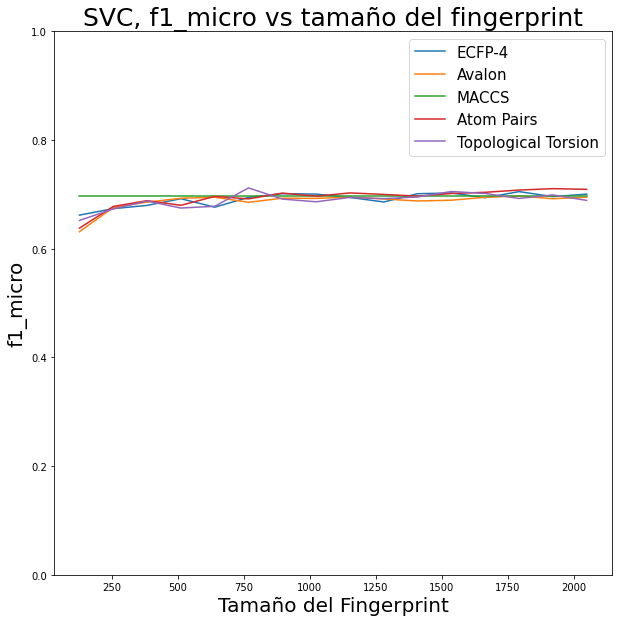

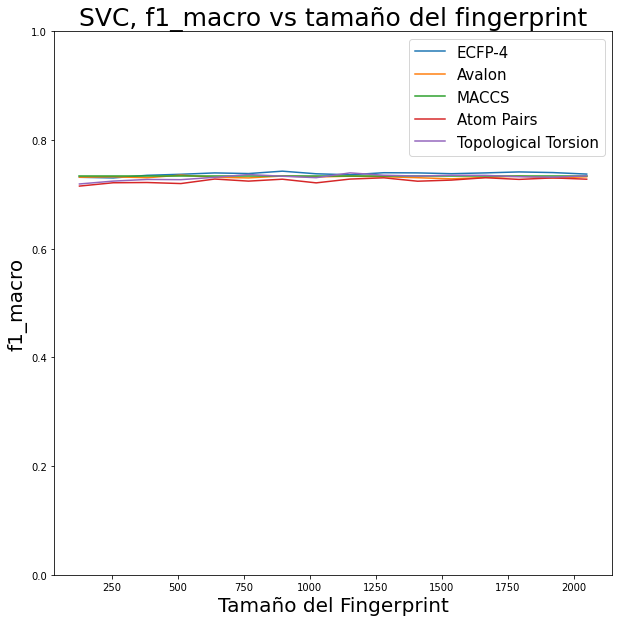

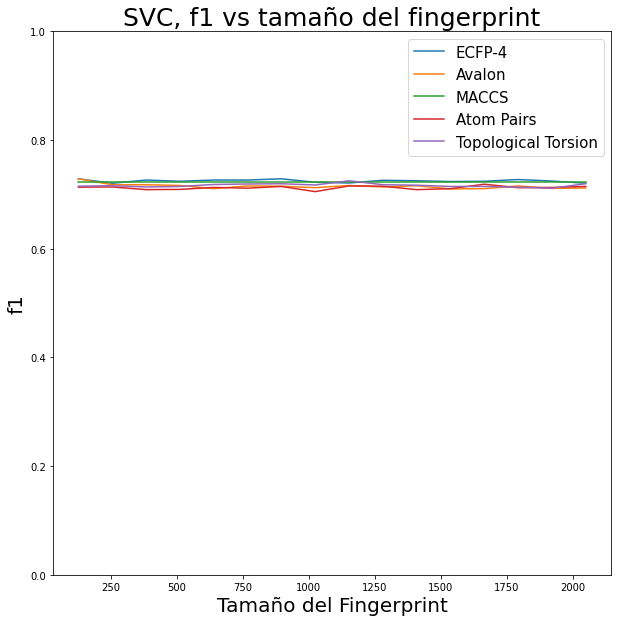

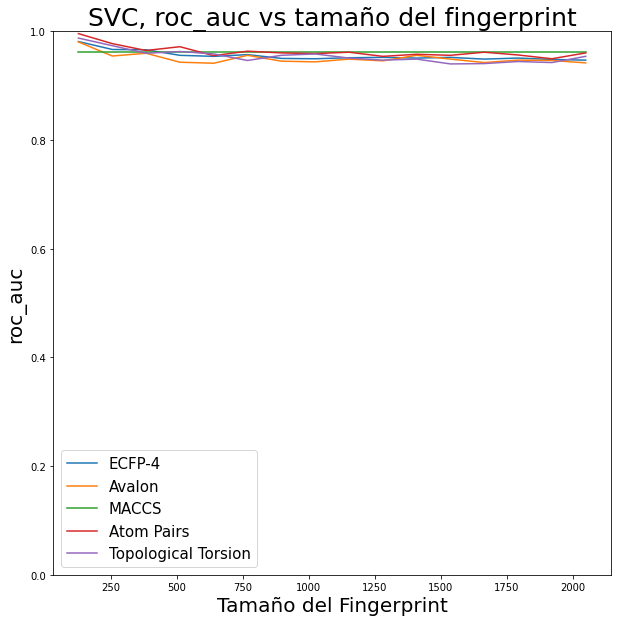

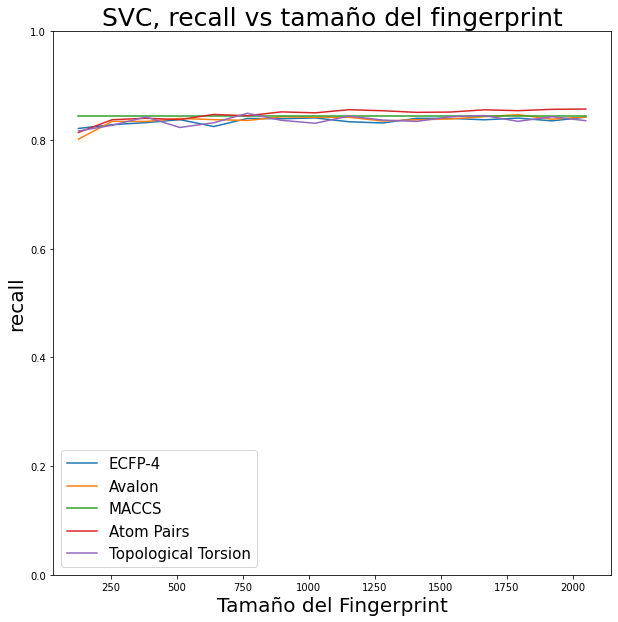

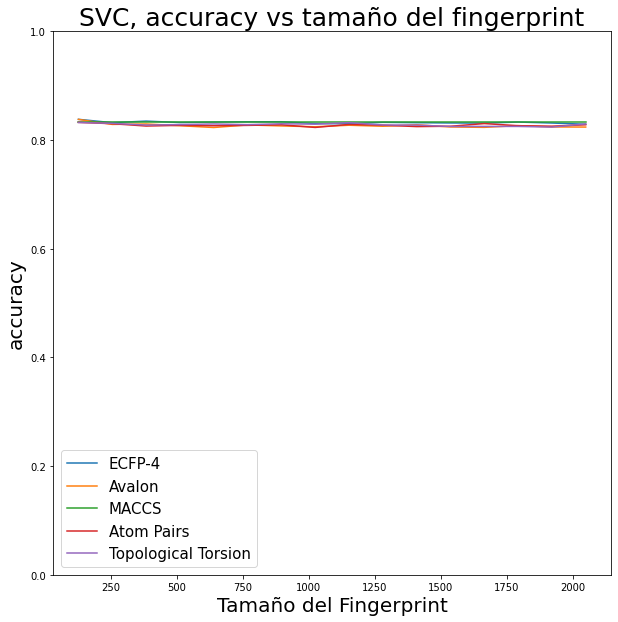

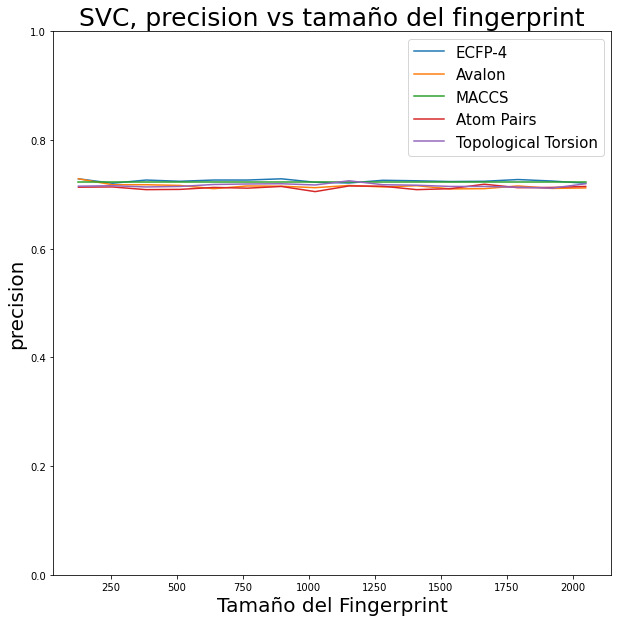

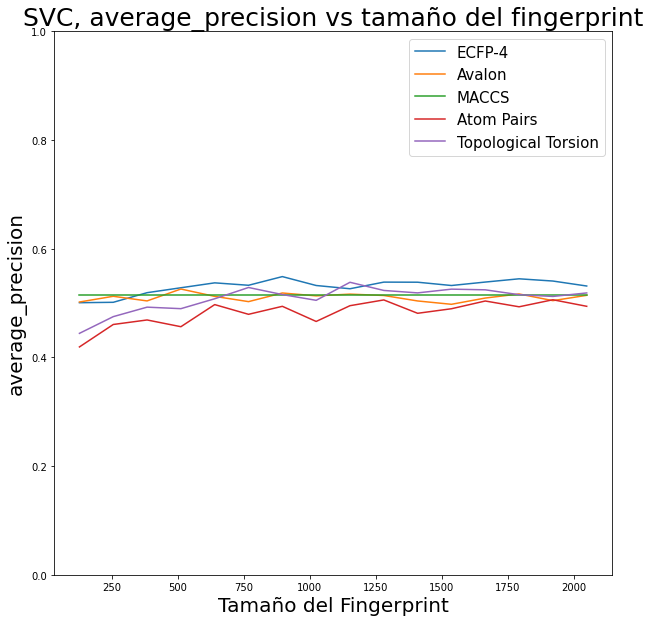

In [ ]:
# Fingerprint length
all_df_results_svc = test_fingerprint_size(df_mols_train, mol_y_train, SVC(gamma="scale", random_state=seed), makeplots=True, write=False)
# Best result with ECFP-4 at 1125 - This will be used to all results

In [ ]:
mol_y_train

,Gastrointestinal disorders,Endocrine disorders,Immune system disorders,Vascular disorders,Psychiatric disorders,Musculoskeletal and connective tissue disorders,General disorders and administration site conditions,Infections and infestations,Metabolism and nutrition disorders,Cardiac disorders,...,"Injury, poisoning and procedural complications",Investigations,Renal and urinary disorders,Surgical and medical procedures,Social circumstances,Ear and labyrinth disorders,Product issues,Eye disorders,"Congenital, familial and genetic disorders","Pregnancy, puerperium and perinatal conditions"
1224,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
525,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1321,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
713,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_final_set = pd.read_csv("datasets/df_final_set.csv")
df_final_set

,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,ECFP4_9,ECFP4_10,...,"Injury, poisoning and procedural complications",Investigations,Renal and urinary disorders,Surgical and medical procedures,Social circumstances,Ear and labyrinth disorders,Product issues,Eye disorders,"Congenital, familial and genetic disorders","Pregnancy, puerperium and perinatal conditions"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1422,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Ultima limpieza de datos
X = df_final_set.iloc[:,0:-27]
X = X.astype(float).fillna(0.0)
y = df_final_set.iloc[:,-27:]
y = y.astype(float).fillna(0.0)
y = y[df_socs_only['SOC'].drop([18, 21, 23], axis=0).reset_index(drop=True).to_list()]
y

,Gastrointestinal disorders,Endocrine disorders,Immune system disorders,Vascular disorders,Psychiatric disorders,Musculoskeletal and connective tissue disorders,General disorders and administration site conditions,Infections and infestations,Metabolism and nutrition disorders,Cardiac disorders,...,Blood and lymphatic system disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",Skin and subcutaneous tissue disorders,"Injury, poisoning and procedural complications",Renal and urinary disorders,Surgical and medical procedures,Ear and labyrinth disorders,Eye disorders,"Congenital, familial and genetic disorders","Pregnancy, puerperium and perinatal conditions"
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1422,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1423,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1424,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
X

,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,ECFP4_9,ECFP4_10,...,arohetcycles,arorings,numhacceptors,numhdonors,numhatoms,numrotbonds,numsatcarbcycles,numsathetcycles,numsatrings,ringcount
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.0,1.0,7.0,4.0,1.0,0.0,1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,2.0,6.0,4.0,1.0,0.0,1.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,2.0,7.0,4.0,1.0,0.0,1.0,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,8.0,0.0,8.0,7.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,2.0,9.0,6.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,5.0,8.0,0.0,0.0,0.0,0.0
1422,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,14.0,4.0,19.0,11.0,0.0,5.0,5.0,9.0
1423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,4.0,8.0,3.0,9.0,9.0,0.0,0.0,0.0,4.0
1424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0


In [ ]:
y

,Gastrointestinal disorders,Endocrine disorders,Immune system disorders,Vascular disorders,Psychiatric disorders,Musculoskeletal and connective tissue disorders,General disorders and administration site conditions,Infections and infestations,Metabolism and nutrition disorders,Cardiac disorders,...,Blood and lymphatic system disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",Skin and subcutaneous tissue disorders,"Injury, poisoning and procedural complications",Renal and urinary disorders,Surgical and medical procedures,Ear and labyrinth disorders,Eye disorders,"Congenital, familial and genetic disorders","Pregnancy, puerperium and perinatal conditions"
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1422,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1423,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1424,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Creación de Fingerprints

In [ ]:
def convertNumpyArrayToList(desc):
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(desc, arr)
    return arr.tolist()

In [ ]:
def getMorganMOL(molecule, length=1024):
    #molecule = Chem.MolFromSmiles(smile)
    try:
        # radius=2 = ECFP4, radius=3 = ECFP6, etc.
        desc = rdMolDescriptors.GetMorganFingerprintAsBitVect(molecule, 2, nBits=length)
    except Exception as e:
        print(e)
        print('error ' + str(molecule))
        desc = np.nan
    return desc

In [ ]:
def ecfp4_fingerprintMOL(df_molecules, length=1024, write=False):
    # Morgan Fingerprint (ECFP4)
    df_w = df_molecules.copy()
    df_w["ECFP4"] = df_w["mols"].apply(lambda x: getMorganMOL(x, length)).apply(convertNumpyArrayToList)
    #canonical_smiles
    # New DF with one column for each ECFP bit
    ecfp_df = df_w['ECFP4'].apply(pd.Series)
    ecfp_df = ecfp_df.rename(columns=lambda x: 'ECFP4_' + str(x + 1))

    # Write to csv
    if write:
        ecfp_df.to_csv("datasets/ecfp4.csv", index=False)

    return ecfp_df

In [ ]:
# Cálculo de los descriptores moleculares
def calcularDescriptores(df_molecules, write=False):
    
    df_mols_desc = df_molecules.copy()

    # Creando los Descriptores (9 columnas)
    df_mols_desc["molweight"] = df_mols_desc["mols"].apply(Descriptors.ExactMolWt)
    df_mols_desc["densmorgan1"] = df_mols_desc["mols"].apply(Descriptors.FpDensityMorgan1)
    df_mols_desc["densmorgan2"] = df_mols_desc["mols"].apply(Descriptors.FpDensityMorgan2)
    df_mols_desc["densmorgan3"] = df_mols_desc["mols"].apply(Descriptors.FpDensityMorgan3)
    df_mols_desc["hatommolwt"] = df_mols_desc["mols"].apply(Descriptors.HeavyAtomMolWt)
    df_mols_desc["maxabspartcharge"] = df_mols_desc["mols"].apply(Descriptors.MaxAbsPartialCharge)
    df_mols_desc["maxpartcharge"] = df_mols_desc["mols"].apply(Descriptors.MaxPartialCharge)
    df_mols_desc["minabspc"] = df_mols_desc["mols"].apply(Descriptors.MinAbsPartialCharge)
    df_mols_desc["minpartcharge"] = df_mols_desc["mols"].apply(Descriptors.MinPartialCharge)
    df_mols_desc["molwt"] = df_mols_desc["mols"].apply(Descriptors.MolWt)
    df_mols_desc["numrade"] = df_mols_desc["mols"].apply(Descriptors.NumRadicalElectrons)
    df_mols_desc["numval"] = df_mols_desc["mols"].apply(Descriptors.NumValenceElectrons)

    #Creando los Lipinski Descriptors (18 columnas)
    df_mols_desc["fracsp33"] = df_mols_desc["mols"].apply(Lipinski.FractionCSP3)
    df_mols_desc["heavyatomcount"] = df_mols_desc["mols"].apply(Lipinski.HeavyAtomCount)
    df_mols_desc["nhohcount"] = df_mols_desc["mols"].apply(Lipinski.NHOHCount)
    df_mols_desc["nocount"] = df_mols_desc["mols"].apply(Lipinski.NOCount)
    df_mols_desc["aliphcarbocycles"] = df_mols_desc["mols"].apply(Lipinski.NumAliphaticCarbocycles)
    df_mols_desc["aliphhetcycles"] = df_mols_desc["mols"].apply(Lipinski.NumAliphaticHeterocycles)
    df_mols_desc["aliphrings"] = df_mols_desc["mols"].apply(Lipinski.NumAliphaticRings)
    df_mols_desc["arocarbocycles"] = df_mols_desc["mols"].apply(Lipinski.NumAromaticCarbocycles)
    df_mols_desc["arohetcycles"] = df_mols_desc["mols"].apply(Lipinski.NumAromaticHeterocycles)
    df_mols_desc["arorings"] = df_mols_desc["mols"].apply(Lipinski.NumAromaticRings)
    df_mols_desc["numhacceptors"] = df_mols_desc["mols"].apply(Lipinski.NumHAcceptors)
    df_mols_desc["numhdonors"] = df_mols_desc["mols"].apply(Lipinski.NumHDonors)
    df_mols_desc["numhatoms"] = df_mols_desc["mols"].apply(Lipinski.NumHeteroatoms)
    df_mols_desc["numrotbonds"] = df_mols_desc["mols"].apply(Lipinski.NumRotatableBonds)
    df_mols_desc["numsatcarbcycles"] = df_mols_desc["mols"].apply(Lipinski.NumSaturatedCarbocycles)
    df_mols_desc["numsathetcycles"] = df_mols_desc["mols"].apply(Lipinski.NumSaturatedHeterocycles)
    df_mols_desc["numsatrings"] = df_mols_desc["mols"].apply(Lipinski.NumSaturatedRings)
    df_mols_desc["ringcount"] = df_mols_desc["mols"].apply(Lipinski.RingCount)

    #Borrar SMILES y MOLS
    df_mols_desc.drop("mols", inplace=True, axis=1)


    #Corregir los NaN como 0
    df_mols_desc = df_mols_desc.fillna(0)

    if write:
        df_mols_desc.to_csv("datasets/df_mols_desc.csv", index=False)

    return df_mols_desc

In [ ]:
# Data OFFSIDES de medicamentos
#df_mol_list = pd.DataFrame(mol_list, columns=['mols'])
df_offsides = pd.read_csv('datasets/offside_socs_modified.csv')
smiles_list_offsides = df_offsides['smiles'].tolist()
mol_list_offsides = []
for smiles in smiles_list_offsides:
    mol = Chem.MolFromSmiles(smiles)
    mol_list_offsides.append(mol)
df_mol_list_of = pd.DataFrame(mol_list_offsides, columns=['mols'])
df_mols_desc_of = calcularDescriptores(df_mol_list_of, False) #, True)
df_mols_desc_of

,molweight,densmorgan1,densmorgan2,densmorgan3,hatommolwt,maxabspartcharge,maxpartcharge,minabspc,minpartcharge,molwt,...,arohetcycles,arorings,numhacceptors,numhdonors,numhatoms,numrotbonds,numsatcarbcycles,numsathetcycles,numsatrings,ringcount
0,288.208930,1.095238,1.809524,2.619048,260.207,0.392797,0.138555,0.138555,-0.392797,288.431,...,0,0,2,1,2,0,3,0,3,4
1,162.112470,1.454545,1.909091,2.181818,146.081,0.481156,0.305713,0.305713,-0.481156,162.209,...,0,0,2,2,4,4,0,0,0,0
2,103.063329,1.714286,2.285714,2.428571,94.049,0.481230,0.302889,0.302889,-0.481230,103.121,...,0,0,2,2,3,3,0,0,0,0
3,473.165896,1.264706,1.970588,2.588235,450.262,0.481229,0.325721,0.325721,-0.481229,473.446,...,1,2,9,7,14,10,0,0,0,3
4,352.224974,1.280000,2.040000,2.720000,320.215,0.481230,0.302851,0.302851,-0.481230,352.471,...,0,0,4,3,5,12,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,393.168856,0.896552,1.551724,2.172414,370.259,0.487270,0.162995,0.162995,-0.487270,393.443,...,1,3,7,1,7,10,0,0,0,3
1328,2138.869561,0.371622,0.682432,1.013514,2009.452,0.507967,0.246224,0.246224,-0.507967,2140.492,...,0,4,32,27,56,38,0,4,4,8
1329,1348.601591,0.806122,1.520408,2.224490,1264.834,0.505469,0.354521,0.354521,-0.505469,1349.506,...,2,4,19,6,27,7,0,3,3,9
1330,1348.675231,0.645833,1.166667,1.645833,1253.008,0.483229,0.407314,0.407314,-0.483229,1349.776,...,2,7,14,8,22,32,0,1,1,8


In [ ]:
ecfp_df_of = ecfp4_fingerprintMOL(df_mol_list_of, 1024, False)
ecfp_df_of

,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,ECFP4_9,ECFP4_10,...,ECFP4_1015,ECFP4_1016,ECFP4_1017,ECFP4_1018,ECFP4_1019,ECFP4_1020,ECFP4_1021,ECFP4_1022,ECFP4_1023,ECFP4_1024
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1329,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1330,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_socs_only = pd.read_csv('datasets/df_socs_only.csv')
df_offsides = df_offsides[df_socs_only['SOC'].drop([18, 21, 23], axis=0).reset_index(drop=True).to_list()]
df_offsides

,Gastrointestinal disorders,Endocrine disorders,Immune system disorders,Vascular disorders,Psychiatric disorders,Musculoskeletal and connective tissue disorders,General disorders and administration site conditions,Infections and infestations,Metabolism and nutrition disorders,Cardiac disorders,...,Blood and lymphatic system disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",Skin and subcutaneous tissue disorders,"Injury, poisoning and procedural complications",Renal and urinary disorders,Surgical and medical procedures,Ear and labyrinth disorders,Eye disorders,"Congenital, familial and genetic disorders","Pregnancy, puerperium and perinatal conditions"
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,1,1,1,1,0,1,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1328,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
1329,1,0,0,1,0,1,1,1,1,1,...,1,1,1,0,0,1,0,0,0,0
1330,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_offsides_s = pd.concat([ecfp_df_of, df_mols_desc_of, df_offsides], axis=1)
df_offsides_s.to_csv("datasets/ofsiprueba.csv")
df_offsides_s

,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,ECFP4_9,ECFP4_10,...,Blood and lymphatic system disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",Skin and subcutaneous tissue disorders,"Injury, poisoning and procedural complications",Renal and urinary disorders,Surgical and medical procedures,Ear and labyrinth disorders,Eye disorders,"Congenital, familial and genetic disorders","Pregnancy, puerperium and perinatal conditions"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,0,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1328,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,0,1,1,1
1329,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,0,0,0
1330,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_mols_desc_of

,molweight,densmorgan1,densmorgan2,densmorgan3,hatommolwt,maxabspartcharge,maxpartcharge,minabspc,minpartcharge,molwt,...,arohetcycles,arorings,numhacceptors,numhdonors,numhatoms,numrotbonds,numsatcarbcycles,numsathetcycles,numsatrings,ringcount
0,288.208930,1.095238,1.809524,2.619048,260.207,0.392797,0.138555,0.138555,-0.392797,288.431,...,0,0,2,1,2,0,3,0,3,4
1,162.112470,1.454545,1.909091,2.181818,146.081,0.481156,0.305713,0.305713,-0.481156,162.209,...,0,0,2,2,4,4,0,0,0,0
2,103.063329,1.714286,2.285714,2.428571,94.049,0.481230,0.302889,0.302889,-0.481230,103.121,...,0,0,2,2,3,3,0,0,0,0
3,473.165896,1.264706,1.970588,2.588235,450.262,0.481229,0.325721,0.325721,-0.481229,473.446,...,1,2,9,7,14,10,0,0,0,3
4,352.224974,1.280000,2.040000,2.720000,320.215,0.481230,0.302851,0.302851,-0.481230,352.471,...,0,0,4,3,5,12,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,393.168856,0.896552,1.551724,2.172414,370.259,0.487270,0.162995,0.162995,-0.487270,393.443,...,1,3,7,1,7,10,0,0,0,3
1328,2138.869561,0.371622,0.682432,1.013514,2009.452,0.507967,0.246224,0.246224,-0.507967,2140.492,...,0,4,32,27,56,38,0,4,4,8
1329,1348.601591,0.806122,1.520408,2.224490,1264.834,0.505469,0.354521,0.354521,-0.505469,1349.506,...,2,4,19,6,27,7,0,3,3,9
1330,1348.675231,0.645833,1.166667,1.645833,1253.008,0.483229,0.407314,0.407314,-0.483229,1349.776,...,2,7,14,8,22,32,0,1,1,8


# Demostración (No utilizar dado a que los dataframes ya se encuentran creados)

## Creando los Drug-ADR Fingerprints

> Haciendo un resumen a lo propuesto por Liu et al (2012), en donde básicamente su esquema trataba de emparejar features químicos (PubChem), biológicos (DrugBank, TTD y KeGG) y fenotípicos (SIDER, TWOSIDES y OFFSIDES), haremos una matriz de clasificación binaria de reacciones adversas que será conocida desde este momento como Matriz de Fingerprints mediante el emparejamiento entre fármaco y Clase de Reacción Adversa. Hemos visualizado 28 SOC's (Clase de Reacción Adversa) haciendo un left join con el id de las reacciones adversas de todos los medicamentos encontrados en SIDER Database. A cada reacción adversa le concatenamos el padre (SOC), para que mediante esta columna podamos crear la matriz binaria entre SOC y Fármaco, en donde cada fila representa un medicamento y los valores de cada celda representa la presencia o ausencia de esa clase de reacción adversa en el fármaco (1 y 0 respectivamente).

> Para los datos de entrenamiento, emplearemos un vector dimensional en el que se compondrá entre features químicos (PubChem CACTV Fingerprint) y fenotípicos (SOC), así como, adicionalmente, se concatenará un vector dimensional de 1024 bits que representará el ECFP4 ya calculado, el volcado de interacción entre un fármaco y el listado de fármacos, que será representado como la densidad de los Morgan Fingerprints en 1024 bits con un radio de 2 y 3. Por último, se incluirá el volcado de similitud de ese fármaco y otros fármacos incluidos en el listado de fármacos con reacciones adversas mapeadas. Para esta última parte, uniremos la información contenida de un fármaco para con todos los fármacos de los cuales presenta similitud y hallar un porcentaje de similitud entre los fármacos con reacciones adversas entre 0% y 100%. 

> Leer la documentación de los CACTVS Fingerprints: https://web.cse.ohio-state.edu/~zhang.10631/bak/drugreposition/list_fingerprints.pdf

In [ ]:
def convertNumpyArrayToList2(desc):
    arr = desc.tolist()
    #DataStructs.ConvertToNumpyArray(desc, arr)
    return arr

In [ ]:
def GetDrugADRFingerprintsAsVect(drug):
    df_socs = pd.read_csv('datasets/df_socs_only.csv')
    socs_list = df_socs.values.tolist()
    all_data = pd.read_csv('datasets/df_meddra_all_se_soc.csv')
    all_se_drug = all_data[all_data['stitch_cid_flat'] == int(drug)]
    se_drug = all_se_drug['SOC'].values.tolist()
    fp_arr = np.zeros((0,))
    for se in socs_list:
        bit = 1 if se[0] in se_drug else 0
        fp_arr = np.append(fp_arr, bit)
    return fp_arr

def GetDrugADR(drug):
    #try:
    desc = GetDrugADRFingerprintsAsVect(drug)
    """except Exception as e:
        print(e)
        print('error ' + str(drug))
        desc = np.nan"""
    return desc

def DrugADRFingerprint(df_drug, write=False):
    df_w = df_drug.copy()
    df_w["SOC"] = df_w["CID"].apply(GetDrugADR).apply(convertNumpyArrayToList2)
    drug_adr_df = df_w['SOC'].apply(pd.Series)
    drug_adr_df = drug_adr_df.rename(columns=lambda x: 'SOC_' + str(x + 1))
    if write:
        drug_adr_df.to_csv("datasets/drug_adr_fingerprints.csv", index=False)

    return drug_adr_df

In [ ]:
## Pruebas de Correlación y Estadística Descriptiva

In [ ]:
df_desc

,molweight,hatommolwt,maxabspartcharge,maxpartcharge,minabspc,minpartcharge,molwt,numrade,numval,fracsp33,...,arohetcycles,arorings,numhacceptors,numhdonors,numhatoms,numrotbonds,numsatcarbcycles,numsathetcycles,numsatrings,ringcount
0,303.033207,289.655,0.464583,0.327025,0.327025,-0.464583,303.767,0,104,0.416667,...,0,1,5,1,7,4,1,0,1,2
1,275.038292,261.645,0.395700,0.181437,0.181437,-0.395700,275.757,0,94,0.454545,...,0,1,4,2,6,4,1,0,1,2
2,289.017557,277.644,0.480753,0.311817,0.311817,-0.480753,289.740,0,98,0.363636,...,0,1,4,2,7,4,1,0,1,2
3,404.147118,380.223,0.492715,0.311666,0.311666,-0.492715,404.415,0,156,0.380952,...,0,2,8,0,8,7,0,0,0,3
4,351.075214,335.218,0.457958,0.389649,0.389649,-0.457958,351.346,0,128,0.428571,...,1,2,4,2,9,6,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,272.209993,244.165,0.373707,0.222664,0.222664,-0.373707,272.389,0,112,0.857143,...,0,0,3,2,5,8,0,0,0,0
1422,880.369030,828.613,0.371494,0.270664,0.270664,-0.371494,881.029,0,332,0.500000,...,1,3,14,4,19,11,0,5,5,9
1423,433.222623,406.300,0.398709,0.250856,0.250856,-0.398709,433.516,0,166,0.304348,...,3,4,8,3,9,9,0,0,0,4
1424,192.151415,172.142,0.395763,0.049577,0.049577,-0.395763,192.302,0,78,0.538462,...,0,0,1,1,1,4,0,0,0,1


In [ ]:
df_corr = df_desc.corr(method='pearson')
df_corr

,molweight,hatommolwt,densmorgan1,densmorgan2,densmorgan3,maxabspartcharge,maxpartcharge,minabspc,minpartcharge,molwt,...,arohetcycles,arorings,numhacceptors,numhdonors,numhatoms,numrotbonds,numsatcarbcycles,numsathetcycles,numsatrings,ringcount
molweight,1.000000,0.998331,-0.629738,-0.519024,-0.331837,0.182026,0.250866,0.256041,-0.167383,0.999994,...,0.017661,0.634285,0.393462,-0.063497,0.646213,0.588909,-0.221966,0.095473,-0.093609,0.551548
hatommolwt,0.998331,1.000000,-0.623439,-0.515894,-0.331696,0.188291,0.264500,0.270421,-0.173259,0.998402,...,0.023616,0.646425,0.407465,-0.068320,0.666357,0.568889,-0.218875,0.078176,-0.104748,0.556713
densmorgan1,-0.629738,-0.623439,1.000000,0.910770,0.684116,-0.116796,-0.031018,-0.033194,0.117623,-0.629421,...,0.181131,-0.549255,-0.072969,0.180275,-0.134064,-0.387419,0.098388,0.039454,0.105214,-0.445609
densmorgan2,-0.519024,-0.515894,0.910770,1.000000,0.912822,-0.139731,-0.024943,-0.019709,0.134186,-0.519032,...,0.396489,-0.330250,-0.018366,0.131904,-0.138604,-0.383939,-0.022729,0.167483,0.113306,-0.195169
densmorgan3,-0.331837,-0.331696,0.684116,0.912822,1.000000,-0.143175,0.003807,0.016982,0.132484,-0.332103,...,0.500920,-0.068740,0.017320,0.066350,-0.131088,-0.334807,-0.159919,0.253281,0.076324,0.074067
maxabspartcharge,0.182026,0.188291,-0.116796,-0.139731,-0.143175,1.000000,0.323611,0.309376,-0.970173,0.181242,...,-0.116501,0.112063,0.377591,0.081353,0.227477,0.171163,0.004370,-0.179183,-0.136318,0.088180
maxpartcharge,0.250866,0.264500,-0.031018,-0.024943,0.003807,0.323611,1.000000,0.974153,-0.215300,0.250227,...,0.118271,0.126055,0.319654,0.042546,0.474119,0.015771,-0.211880,0.017390,-0.146821,0.082693
minabspc,0.256041,0.270421,-0.033194,-0.019709,0.016982,0.309376,0.974153,1.000000,-0.253247,0.255395,...,0.133016,0.151366,0.350801,0.049245,0.480306,0.014085,-0.220819,0.016380,-0.154374,0.105704
minpartcharge,-0.167383,-0.173259,0.117623,0.134186,0.132484,-0.970173,-0.215300,-0.253247,1.000000,-0.166640,...,0.113945,-0.126966,-0.384505,-0.085126,-0.194900,-0.170240,-0.014237,0.183861,0.132496,-0.104345
molwt,0.999994,0.998402,-0.629421,-0.519032,-0.332103,0.181242,0.250227,0.255395,-0.166640,1.000000,...,0.017006,0.634016,0.392448,-0.063746,0.646183,0.588871,-0.221732,0.094866,-0.093906,0.550738


Text(0, 0.5, 'Peso molecular')

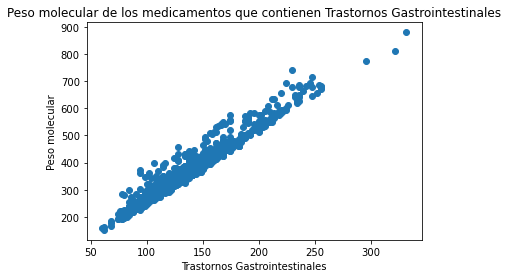

In [ ]:
plt.scatter(df_desc['numval'], df_desc['molweight'])
plt.title('Peso molecular de los medicamentos que contienen Trastornos Gastrointestinales')
plt.xlabel('Trastornos Gastrointestinales')
plt.ylabel('Peso molecular')

<AxesSubplot:>

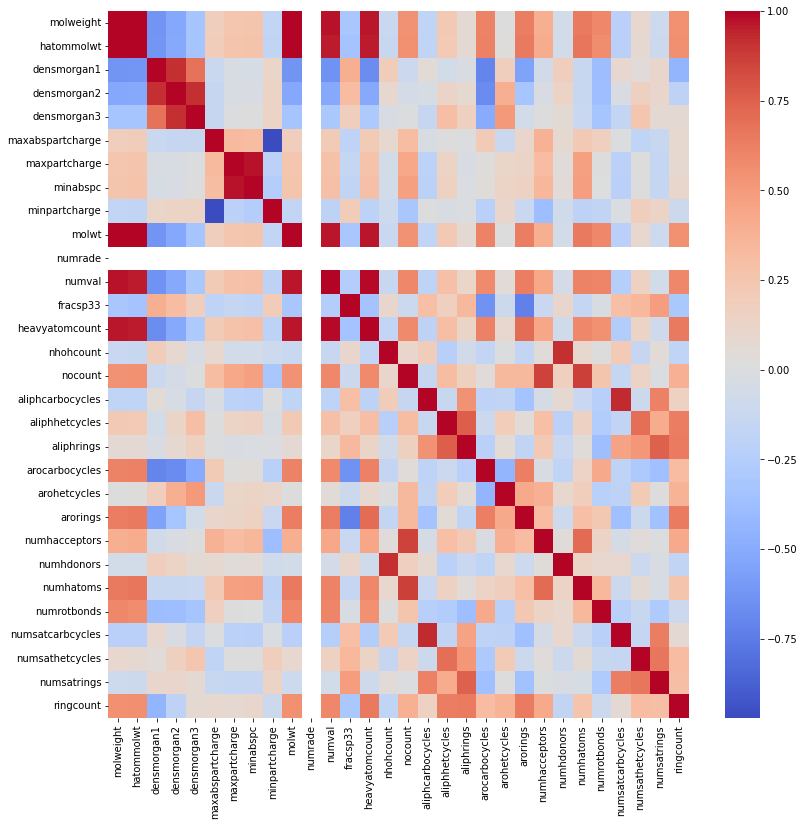

In [ ]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, cmap='coolwarm', ax=ax)
#plt.savefig(f'results/Correlacion de Pearson - Descriptores moleculares.png', dpi = 300)

## Interactuando con la base de datos Drug-Gene

In [ ]:
df_gene = pd.read_csv("datasets/dgidb/interactions.tsv", sep="\t")
df_gene.dropna(subset=["drug_name"])

,gene_name,gene_claim_name,entrez_id,interaction_claim_source,interaction_types,drug_claim_name,drug_claim_primary_name,drug_name,drug_concept_id,interaction_group_score,PMIDs
0,CDK7,CDK7,1022.0,CancerCommons,inhibitor,SNS-032,SNS-032,BMS-387032,chembl:CHEMBL296468,0.82,NaN
1,VDR,VDR,7421.0,DTC,NaN,NIFEKALANT,NIFEKALANT,NIFEKALANT,chembl:CHEMBL360861,0.14,NaN
2,GPR55,GPR55,9290.0,DTC,NaN,BISACODYL,BISACODYL,BISACODYL,chembl:CHEMBL942,0.94,NaN
3,NR1H4,NR1H4,9971.0,DTC,NaN,PENTACHLOROPHENOL,PENTACHLOROPHENOL,PENTACHLOROPHENOL,chembl:CHEMBL75967,0.07,NaN
5,APOE,APOE,348.0,NCI,NaN,PREDNISONE,PREDNISONE,PREDNISONE,chembl:CHEMBL635,0.23,3185288
...,...,...,...,...,...,...,...,...,...,...,...
85449,CSF1R,CSF1R,1436.0,DTC,NaN,BAY-613606,BAY-613606,CHEMBL541400,chembl:CHEMBL541400,0.03,NaN
85452,CDK8,CDK8,1024.0,DTC,NaN,TCMDC-125758,TCMDC-125758,CHEMBL546797,chembl:CHEMBL546797,0.09,NaN
85455,PIK3C3,PIK3C3,5289.0,MyCancerGenome,inhibitor,BGJ398,BGJ398,INFIGRATINIB,chembl:CHEMBL1852688,0.17,NaN
85458,PRKCA,PRKCA,5578.0,DTC,NaN,RESVERATROL,RESVERATROL,RESVERATROL,chembl:CHEMBL165,0.12,21880495


In [ ]:
genes = pd.read_csv("datasets/dgidb/dGene_04-16-2013_2257.tsv", sep="\t")
genes

,tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,gene_type,symbol_from_authority,full_name,nomenclature_status,other_designations,modification_date,class
0,9606,117,ADCYAP1R1,-,PAC1|PAC1R|PACAPR|PACAPRI,HGNC:242|MIM:102981|Ensembl:ENSG00000078549|HP...,7,7p14,adenylate cyclase activating polypeptide 1 (pi...,protein-coding,ADCYAP1R1,adenylate cyclase activating polypeptide 1 (pi...,O,PACAP receptor 1|PACAP type I receptor|PACAP-R...,20120610,GPCR
1,9606,134,ADORA1,-,RDC7,HGNC:262|MIM:102775|Ensembl:ENSG00000163485|HP...,1,1q32.1,adenosine A1 receptor,protein-coding,ADORA1,adenosine A1 receptor,O,adenosine receptor A1,20120624,GPCR
2,9606,135,ADORA2A,-,ADORA2|RDC8|hA2aR,HGNC:263|MIM:102776|Ensembl:ENSG00000128271|HP...,22,22q11.23,adenosine A2a receptor,protein-coding,ADORA2A,adenosine A2a receptor,O,adenosine A2 receptor|adenosine receptor A2a|a...,20120623,GPCR
3,9606,136,ADORA2B,-,ADORA2,HGNC:264|MIM:600446|Ensembl:ENSG00000170425|HP...,17,17p12,adenosine A2b receptor,protein-coding,ADORA2B,adenosine A2b receptor,O,adenosine receptor A2b,20120624,GPCR
4,9606,140,ADORA3,RP11-552M11.7,A3AR|AD026|bA552M11.5,HGNC:268|MIM:600445|Ensembl:ENSG00000121933|HP...,1,1p13.2,adenosine A3 receptor,protein-coding,ADORA3,adenosine A3 receptor,O,adenosine receptor A3,20120618,GPCR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,9606,7294,TXK,-,BTKL|PSCTK5|PTK4|RLK|TKL,HGNC:12434|MIM:600058|Ensembl:ENSG00000074966|...,4,4p12,TXK tyrosine kinase,protein-coding,TXK,TXK tyrosine kinase,O,PTK4 protein tyrosine kinase 4|protein-tyrosin...,20120622,Y_KINASE
2253,9606,7297,TYK2,-,JTK1,HGNC:12440|MIM:176941|Ensembl:ENSG00000105397|...,19,19p13.2,tyrosine kinase 2,protein-coding,TYK2,tyrosine kinase 2,O,non-receptor tyrosine-protein kinase TYK2,20120622,Y_KINASE
2254,9606,7301,TYRO3,-,BYK|Dtk|RSE|Sky|Tif,HGNC:12446|MIM:600341|Ensembl:ENSG00000092445|...,15,15q15,TYRO3 protein tyrosine kinase,protein-coding,TYRO3,TYRO3 protein tyrosine kinase,O,tyrosine-protein kinase DTK|tyrosine-protein k...,20120622,Y_KINASE
2255,9606,7525,YES1,-,HsT441|P61-YES|Yes|c-yes,HGNC:12841|MIM:164880|Ensembl:ENSG00000176105|...,18,18p11.31-p11.21,v-yes-1 Yamaguchi sarcoma viral oncogene homol...,protein-coding,YES1,v-yes-1 Yamaguchi sarcoma viral oncogene homol...,O,Yamaguchi sarcoma oncogene|cellular yes-1 prot...,20120623,Y_KINASE


In [ ]:
## PharmGKB
drugs_pharm = pd.read_csv("datasets/PharmGKB/drugs.tsv", sep="\t")
drugs_pharm

,PharmGKB Accession Id,Name,Generic Names,Trade Names,Brand Mixtures,Type,Cross-references,SMILES,InChI,Dosing Guideline,...,VIP Count,Dosing Guideline Sources,Top Clinical Annotation Level,Top FDA Label Testing Level,Top Any Drug Label Testing Level,Label Has Dosing Info,Has Rx Annotation,RxNorm Identifiers,ATC Identifiers,PubChem Compound Identifiers
0,PA166238901,17-alpha-dihydroequilenin sulfate,NaN,NaN,NaN,Drug,PubChem Compound:23671798,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23671798
1,PA166238881,17-alpha-dihydroequilin,NaN,NaN,NaN,Drug,PubChem Compound:9547222,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9547222
2,PA166238883,17-alpha-dihydroequilin sulfate,NaN,NaN,NaN,Drug,PubChem Compound:23671797,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23671797
3,PA166238882,17-alpha-estradiol sulfate,NaN,NaN,NaN,Drug,PubChem Compound:23671799,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23671799
4,PA166238921,17-beta-dihydroequilenin sulfate,NaN,NaN,NaN,Drug,PubChem Compound:71316159,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71316159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,PA451978,zonisamide,"Zonisamida [Spanish],""Zonisamidum [Latin]"",""zo...","Exceglan,""Excegram"",""Excegran"",""Zonegran""",NaN,Drug,"BindingDB:10888,""ChEBI:CHEBI:10127"",""Chemical ...",C1=CC=C2C(=C1)C(=NO2)CS(=O)(=O)N,"InChI=1S/C8H8N2O3S/c9-14(11,12)5-7-6-3-1-2-4-8...",No,...,1,NaN,3,NaN,Informative PGx,NaN,NaN,39998,N03AX15,5734
3505,PA10236,zopiclone,"(+-)-zopiclone,""Zopiclona [INN-Spanish]"",""Zopi...","Amoban,""Amovane"",""Imovance"",""Imovane"",""Novo-zo...",NaN,Drug,"BindingDB:50054136,""Canadian Drugs Product Dat...",CN1CCN(CC1)C(=O)OC2C3=NC=CN=C3C(=O)N2C4=NC=C(C...,InChI=1S/C17H17ClN6O3/c1-22-6-8-23(9-7-22)17(2...,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,40001,N05CF01,5735
3506,PA164924567,Zosuquidar,NaN,NaN,NaN,Drug,NaN,NaN,NaN,No,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,PA452606,zoxazolamine,NaN,NaN,NaN,Drug,NaN,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## PharmGKB
gene_pharm = pd.read_csv("datasets/PharmGKB/genes.tsv", sep="\t")
gene_pharm

,PharmGKB Accession Id,NCBI Gene ID,HGNC ID,Ensembl Id,Name,Symbol,Alternate Names,Alternate Symbols,Is VIP,Has Variant Annotation,Cross-references,Has CPIC Dosing Guideline,Chromosome,Chromosomal Start - GRCh37,Chromosomal Stop - GRCh37,Chromosomal Start - GRCh38,Chromosomal Stop - GRCh38
0,PA24356,1,HGNC:5,ENSG00000121410,alpha-1-B glycoprotein,A1BG,NaN,NaN,No,No,"ALFRED:LO098153A,""Comparative Toxicogenomics D...",No,chr19,58858172.0,58864865.0,58346806.0,58353499.0
1,PA165392995,503538,HGNC:37133,ENSG00000268895,A1BG antisense RNA 1,A1BG-AS1,NaN,FLJ23569,No,No,"Ensembl:ENSG00000268895,""GeneCard:A1BG-AS1"",""H...",No,chr19,58863336.0,58866549.0,58351970.0,58355183.0
2,PA162375098,29974,HGNC:24086,ENSG00000148584,APOBEC1 complementation factor,A1CF,NaN,"ACF,""ACF64"",""ACF65"",""APOBEC1CF"",""ASP""",No,No,"ALFRED:LO039626A,""Ensembl:ENSG00000148584"",""Ge...",No,chr10,52559169.0,52645435.0,50799409.0,50885681.0
3,PA24357,2,HGNC:7,ENSG00000175899,alpha-2-macroglobulin,A2M,NaN,"CPAMD5,""FWP007"",""S863-7""",No,Yes,"ALFRED:LO038588G,""Comparative Toxicogenomics D...",No,chr12,9220304.0,9268558.0,9067708.0,9115962.0
4,PA142670460,144568,HGNC:23336,ENSG00000166535,alpha-2-macroglobulin like 1,A2ML1,alpha-2-macroglobulin-like 1,"CPAMD9,""FLJ25179"",""p170""",No,No,"ALFRED:LO040147Q,""Ensembl:ENSG00000166535"",""Ge...",No,chr12,8975150.0,9029381.0,8822472.0,8887202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24545,PA142670467,440590,HGNC:32058,ENSG00000203995,"zyg-11 family member A, cell cycle regulator",ZYG11A,NaN,ZYG11,No,No,"ALFRED:LO041246R,""Ensembl:ENSG00000203995"",""Ge...",No,chr1,53308183.0,53360247.0,52842511.0,52894575.0
24546,PA142670468,79699,HGNC:25820,ENSG00000162378,"zyg-11 family member B, cell cycle regulator",ZYG11B,NaN,"FLJ13456,""ZYG11""",No,No,"ALFRED:LO029790B,""Ensembl:ENSG00000162378"",""Ge...",No,chr1,53192126.0,53293014.0,52726454.0,52827342.0
24547,PA37765,7791,HGNC:13200,ENSG00000159840,zyxin,ZYX,NaN,NaN,No,No,"ALFRED:LO266050T,""Comparative Toxicogenomics D...",No,chr7,143078338.0,143088204.0,143381174.0,143391111.0
24548,PA134938508,23140,HGNC:29027,ENSG00000074755,zinc finger ZZ-type and EF-hand domain contain...,ZZEF1,"zinc finger, ZZ-type with EF-hand domain 1","FLJ10821,""KIAA0399"",""ZZZ4""",No,No,"ALFRED:LO009052Q,""Ensembl:ENSG00000074755"",""Ge...",No,chr17,3907739.0,4046314.0,4004445.0,4143020.0


In [ ]:
# CTD
ctd_chemical_disease = pd.read_csv("datasets/CTD/CTD_chemicals_diseases.tsv", sep="\t")

7908042    zymosterol
7908043    zymosterol
7908044    zymosterol
7908045    zymosterol
7908046    zymosterol
Name: ChemicalName, dtype: object

In [ ]:
ctd_chemical_disease

,ChemicalName,ChemicalID,CasRN,DiseaseName,DiseaseID,DirectEvidence,InferenceGeneSymbol,InferenceScore,OmimIDs,PubMedIDs
0,06-Paris-LA-66 protocol,C046983,NaN,Precursor Cell Lymphoblastic Leukemia-Lymphoma,MESH:D054198,therapeutic,NaN,NaN,NaN,4519131
1,10074-G5,C534883,NaN,Adenocarcinoma,MESH:D000230,NaN,MYC,4.09,NaN,26432044
2,10074-G5,C534883,NaN,Adenocarcinoma of Lung,MESH:D000077192,NaN,MYC,4.31,NaN,26656844|27602772
3,10074-G5,C534883,NaN,Alopecia,MESH:D000505,NaN,AR,4.50,NaN,15902657
4,10074-G5,C534883,NaN,Androgen-Insensitivity Syndrome,MESH:D013734,NaN,AR,6.85,300068|312300,1303262|8281139
...,...,...,...,...,...,...,...,...,...,...
7908042,zymosterol,C015582,128-33-6,"Bone Diseases, Metabolic",MESH:D001851,NaN,CYP27A1,5.99,NaN,24381012
7908043,zymosterol,C015582,128-33-6,Cholestasis,MESH:D002779,NaN,CYP27A1,4.91,NaN,15795599
7908044,zymosterol,C015582,128-33-6,Liver Cirrhosis,MESH:D008103,NaN,CYP27A1,4.98,NaN,24381012
7908045,zymosterol,C015582,128-33-6,"MICROCEPHALY, CONGENITAL CATARACT, AND PSORIAS...",OMIM:616834,NaN,MSMO1,7.81,616834,NaN


In [ ]:
ctd_chemical_disease[ctd_chemical_disease["ChemicalName"] == "cetirizine"]

,ChemicalName,ChemicalID,CasRN,DiseaseName,DiseaseID,DirectEvidence,InferenceGeneSymbol,InferenceScore,OmimIDs,PubMedIDs


In [ ]:
a = ctd_chemical_disease["ChemicalName"].unique()
ser = pd.DataFrame(a)
ser.to_csv("datasets/ser.csv")

## Interactuando con la base de datos LINCS